# Concrete Damage Identification Project

### An Application of Machine Learning for Civil Engineering Case Study

### Using Tensorflow Deep Learning Library

***
## 1. Data Extraction

In [2]:
"""
Created on 30 Sep 2017

@author: Aamir
"""
import os
os.chdir("D:/Workspace/Python/Research/Civil-Concrete-Damage/")
%matplotlib inline

### Import Libraries

In [3]:
import scipy.io
import numpy as np
import pandas as pd
from math import log10, floor
from datetime import datetime
import h5py

from aamir_utils import random_mini_batches
from sklearn.model_selection import train_test_split
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

import scipy
from PIL import Image
from scipy import ndimage
import matplotlib.pyplot as plt

In [4]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

## 2. Import and select relevant data 

### Load Excel files

In [5]:
temp1 = pd.read_excel("Type 1.xlsx", sheetname="B1")
temp2 = pd.read_excel("Type 1.xlsx", sheetname="B2")
temp3 = pd.read_excel("Type 1.xlsx", sheetname="B3")

In [10]:
temp1.shape, temp2.shape, temp3.shape

((258735, 37), (138661, 42), (162644, 19))

### Clean Columns/Rows

In [11]:
train_set = temp1.iloc[:,0:20]
test_set = temp2.iloc[:,0:21]
new_set = temp3.iloc[:,0:19]

In [12]:
train_set = train_set[train_set.ID!='ID']
train_set.dropna(inplace=True)
test_set = test_set[test_set.ID!='ID']
test_set.dropna(inplace=True)
new_set = new_set[new_set.ID!='ID']
new_set.dropna(inplace=True)

In [13]:
train_set.shape, test_set.shape, new_set.shape

((127718, 20), (68534, 21), (80124, 19))

In [14]:
test_set['SIG-STRNGTH'] = (test_set["SIG"].astype(str).map(str) + test_set["STRNGTH"].astype(str)).astype(float)
test_set.drop('SIG',axis=1,inplace=True)
test_set.drop('STRNGTH',axis=1,inplace=True)

In [15]:
test_set = test_set[train_set.columns]
new_set = new_set[train_set.columns[0:-1]]

### Merge two sets

In [16]:
combined_set = pd.concat([train_set,test_set])
combined_set.reset_index(drop=True,inplace=True)

In [17]:
new_set.reset_index(drop=True,inplace=True)

### Datatype integrity check

In [18]:
combined_set['ID'] = combined_set['ID'].astype(float)
combined_set['DDD'] = combined_set['DDD'].astype(float)
combined_set['PARA1'] = combined_set['PARA1'].astype(float)
combined_set['CH'] = combined_set['CH'].astype(float)
combined_set['RISE'] = combined_set['RISE'].astype(float)
combined_set['COUN'] = combined_set['COUN'].astype(float)
combined_set['ENER'] = combined_set['ENER'].astype(float)
combined_set['DURATION'] = combined_set['DURATION'].astype(float)
combined_set['AMP'] = combined_set['AMP'].astype(float)
combined_set['A-FRQ'] = combined_set['A-FRQ'].astype(float)
combined_set['RMS'] = combined_set['RMS'].astype(float)
combined_set['ASL'] = combined_set['ASL'].astype(float)
combined_set['PCNTS'] = combined_set['PCNTS'].astype(float)
combined_set['THR'] = combined_set['THR'].astype(float)
combined_set['R-FRQ'] = combined_set['R-FRQ'].astype(float)
combined_set['I-FRQ'] = combined_set['I-FRQ'].astype(float)
combined_set['SIG-STRNGTH'] = combined_set['SIG-STRNGTH'].astype(float)
combined_set['ABS-ENERGY'] = combined_set['ABS-ENERGY'].astype(float)
combined_set['DAMAGE'] = combined_set['DAMAGE'].astype(float)


In [19]:
new_set['ID'] = new_set['ID'].astype(float)
new_set['DDD'] = new_set['DDD'].astype(float)
new_set['PARA1'] = new_set['PARA1'].astype(float)
new_set['CH'] = new_set['CH'].astype(float)
new_set['RISE'] = new_set['RISE'].astype(float)
new_set['COUN'] = new_set['COUN'].astype(float)
new_set['ENER'] = new_set['ENER'].astype(float)
new_set['DURATION'] = new_set['DURATION'].astype(float)
new_set['AMP'] = new_set['AMP'].astype(float)
new_set['A-FRQ'] = new_set['A-FRQ'].astype(float)
new_set['RMS'] = new_set['RMS'].astype(float)
new_set['ASL'] = new_set['ASL'].astype(float)
new_set['PCNTS'] = new_set['PCNTS'].astype(float)
new_set['THR'] = new_set['THR'].astype(float)
new_set['R-FRQ'] = new_set['R-FRQ'].astype(float)
new_set['I-FRQ'] = new_set['I-FRQ'].astype(float)
new_set['SIG-STRNGTH'] = new_set['SIG-STRNGTH'].astype(float)
new_set['ABS-ENERGY'] = new_set['ABS-ENERGY'].astype(float)

### Feature engineering

In [20]:
combined_set['HR'] = combined_set['HH:MM:SS.mmmuuun'].apply(lambda x: x.hour)
combined_set['MIN'] = combined_set['HH:MM:SS.mmmuuun'].apply(lambda x: x.minute)
combined_set['SEC'] = combined_set['HH:MM:SS.mmmuuun'].apply(lambda x: x.second)
combined_set['USEC'] = combined_set['HH:MM:SS.mmmuuun'].apply(lambda x: x.microsecond)
combined_set.drop('ID',axis=1,inplace=True)
combined_set.drop('DDD',axis=1,inplace=True)
combined_set.drop('THR',axis=1,inplace=True)
combined_set.drop('HH:MM:SS.mmmuuun',axis=1,inplace=True)

In [21]:
new_set['HR'] = new_set['HH:MM:SS.mmmuuun'].apply(lambda x: x.hour)
new_set['MIN'] = new_set['HH:MM:SS.mmmuuun'].apply(lambda x: x.minute)
new_set['SEC'] = new_set['HH:MM:SS.mmmuuun'].apply(lambda x: x.second)
new_set['USEC'] = new_set['HH:MM:SS.mmmuuun'].apply(lambda x: x.microsecond)
new_set.drop('ID',axis=1,inplace=True)
new_set.drop('DDD',axis=1,inplace=True)
new_set.drop('THR',axis=1,inplace=True)
new_set.drop('HH:MM:SS.mmmuuun',axis=1,inplace=True)

Use one-hot encoding for Y

In [22]:
X_combined1 = combined_set.copy()
Y_combined1 = X_combined1.pop('DAMAGE')

Normalize inputs

In [23]:
u = X_combined1.mean()
v = X_combined1.var()
v.HR = 0.00000000000001
X_combined2 = (X_combined1 - u) / v

In [24]:
Y_combined2 = np.subtract(Y_combined1,1).astype(int)
Y_combined = np.eye(4)[Y_combined2]
X_combined = X_combined2.values

X_combined.shape, Y_combined.shape

((196252, 19), (196252, 4))

In [25]:
X_combined

array([[  3.59076272e+02,  -9.64371985e-01,  -9.25202862e-05, ...,
         -2.69086139e-01,  -5.48376437e-02,  -3.45127709e-06],
       [  1.91803972e+02,   1.20135841e+00,  -9.39043901e-05, ...,
         -2.69086139e-01,  -5.48376437e-02,   6.20823168e-08],
       [  1.91803972e+02,  -9.64371985e-01,  -9.48271259e-05, ...,
         -2.69086139e-01,  -5.14168416e-02,   3.51548679e-06],
       ..., 
       [  2.45316712e+01,   1.18493214e-01,  -9.19435763e-05, ...,
          1.46845210e-01,  -7.19416540e-02,  -1.29289930e-06],
       [  7.07560232e+02,   1.18493214e-01,   5.41947205e-05, ...,
          1.46845210e-01,  -7.19416540e-02,  -1.17298942e-06],
       [  3.17258197e+02,  -9.64371985e-01,   9.21422340e-05, ...,
          1.46845210e-01,  -7.19416540e-02,  -1.14900745e-06]])

### Split Training/Development/Test Sets

In [26]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X_combined, Y_combined, test_size=0.1, )

In [27]:
X_train.shape, X_temp.shape, Y_train.shape, Y_temp.shape

((176626, 19), (19626, 19), (176626, 4), (19626, 4))

In [28]:
X_dev, X_test, Y_dev, Y_test = train_test_split(X_temp, Y_temp, test_size=10000)

In [29]:
X_dev.shape, X_test.shape, Y_dev.shape, Y_test.shape

((9626, 19), (10000, 19), (9626, 4), (10000, 4))

Take transpose for the model

In [30]:
X_train = X_train.T
Y_train = Y_train.T
X_dev = X_dev.T
Y_dev = Y_dev.T
X_test = X_test.T
Y_test = Y_test.T

In [31]:
X_train.shape, Y_train.shape, X_dev.shape, Y_dev.shape, X_test.shape, Y_test.shape

((19, 176626), (4, 176626), (19, 9626), (4, 9626), (19, 10000), (4, 10000))

At the end, we have three sets
- Training set (176626,22) and (176626,4)
- Dev set (9626,22) and (9626,4)
- Test set (10000,22) and (10000,4)

***
## 3. Create Model

### Model variables

In [32]:
(n_x, m) = X_train.shape
n_y = Y_train.shape[0]
learning_rate = 0.0001 #0.0001
num_epochs = 8000
minibatch_size = 32
decay_rate = 1
print_cost = True
tf.set_random_seed(1)
seed = 3 
print(m,n_x,n_y, learning_rate)

176626 19 4 0.0001


### Create placeholder

In [33]:
X = tf.placeholder(shape=[n_x,None],dtype=tf.float32)
Y = tf.placeholder(shape=[n_y,None],dtype=tf.float32)
print(X,Y)

Tensor("Placeholder:0", shape=(19, ?), dtype=float32) Tensor("Placeholder_1:0", shape=(4, ?), dtype=float32)


### Initialize parameters

In [34]:
# Define layers structure
    
tf.set_random_seed(1)  

W1 = tf.get_variable("W1", [25,n_x], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
W2 = tf.get_variable("W2", [12,25], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b2 = tf.get_variable("b2", [12,1], initializer = tf.zeros_initializer())
W3 = tf.get_variable("W3", [n_y,12], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b3 = tf.get_variable("b3", [n_y,1], initializer = tf.zeros_initializer())


### Create model

In [39]:
# forward propagation
Z1 = tf.add(tf.matmul(W1,X),b1)             # Z1 = np.dot(W1, X) + b1
A1 = tf.nn.relu(Z1)                         # A1 = relu(Z1)
Z2 = tf.add(tf.matmul(W2,A1),b2)            # Z2 = np.dot(W2, a1) + b2
A2 = tf.nn.relu(Z2)                         # A2 = relu(Z2)
Z3 = tf.add(tf.matmul(W3,A2),b3)            # Z3 = np.dot(W3, a2) + b3
#A3 = tf.nn.relu(Z3)                         # A3 = relu(Z3)
#Z4 = tf.add(tf.matmul(W4,A3),b4)    

# compute cost
logits = tf.transpose(Z3)
labels = tf.transpose(Y)
print(logits, labels)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))

# backward propagation
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)  #/ (1+decay_rate*epoch)




Tensor("transpose:0", shape=(?, 4), dtype=float32) Tensor("transpose_1:0", shape=(?, 4), dtype=float32)


### Run model

In [40]:
init = tf.global_variables_initializer()
costs = []  
sess = tf.Session()

# Run the initialization
sess.run(init)

# Do the training loop
for epoch in range(num_epochs):
    #print("LR for epoch %i: %f" % (epoch, (learning_rate / (1+decay_rate*epoch))))
    epoch_cost = 0.                       # Defines a cost related to an epoch
    num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
    seed = seed + 1
    minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

    for minibatch in minibatches:
        # Select a minibatch
        (minibatch_X, minibatch_Y) = minibatch
        # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
        _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
        
        epoch_cost += minibatch_cost / num_minibatches

    # Print the cost every epoch
    if print_cost == True and epoch % 1 == 0:
        print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
    if print_cost == True and epoch % 1 == 0:
        costs.append(epoch_cost)


Cost after epoch 0: 3.808961
Cost after epoch 1: 1.031148
Cost after epoch 2: 0.990423
Cost after epoch 3: 0.945371
Cost after epoch 4: 0.867691
Cost after epoch 5: 0.750795
Cost after epoch 6: 0.606673
Cost after epoch 7: 0.491770
Cost after epoch 8: 0.431835
Cost after epoch 9: 0.393004
Cost after epoch 10: 0.366925
Cost after epoch 11: 0.347067
Cost after epoch 12: 0.332149
Cost after epoch 13: 0.320439
Cost after epoch 14: 0.311365
Cost after epoch 15: 0.304313
Cost after epoch 16: 0.297240
Cost after epoch 17: 0.291864
Cost after epoch 18: 0.286752
Cost after epoch 19: 0.282101
Cost after epoch 20: 0.278257
Cost after epoch 21: 0.275091
Cost after epoch 22: 0.271562
Cost after epoch 23: 0.267786
Cost after epoch 24: 0.265019
Cost after epoch 25: 0.262555
Cost after epoch 26: 0.259685
Cost after epoch 27: 0.257335
Cost after epoch 28: 0.255047
Cost after epoch 29: 0.253072
Cost after epoch 30: 0.250875
Cost after epoch 31: 0.249069
Cost after epoch 32: 0.246826
Cost after epoch 33:

Cost after epoch 268: 0.152329
Cost after epoch 269: 0.153500
Cost after epoch 270: 0.152527
Cost after epoch 271: 0.152375
Cost after epoch 272: 0.152542
Cost after epoch 273: 0.153628
Cost after epoch 274: 0.152161
Cost after epoch 275: 0.153239
Cost after epoch 276: 0.153121
Cost after epoch 277: 0.154026
Cost after epoch 278: 0.151665
Cost after epoch 279: 0.152268
Cost after epoch 280: 0.152333
Cost after epoch 281: 0.152408
Cost after epoch 282: 0.152199
Cost after epoch 283: 0.152406
Cost after epoch 284: 0.152512
Cost after epoch 285: 0.151889
Cost after epoch 286: 0.152893
Cost after epoch 287: 0.152228
Cost after epoch 288: 0.150873
Cost after epoch 289: 0.152999
Cost after epoch 290: 0.151245
Cost after epoch 291: 0.152616
Cost after epoch 292: 0.151995
Cost after epoch 293: 0.151852
Cost after epoch 294: 0.152863
Cost after epoch 295: 0.151711
Cost after epoch 296: 0.152173
Cost after epoch 297: 0.151673
Cost after epoch 298: 0.152345
Cost after epoch 299: 0.151222
Cost aft

Cost after epoch 533: 0.144743
Cost after epoch 534: 0.145347
Cost after epoch 535: 0.144436
Cost after epoch 536: 0.145354
Cost after epoch 537: 0.146265
Cost after epoch 538: 0.144562
Cost after epoch 539: 0.144869
Cost after epoch 540: 0.145122
Cost after epoch 541: 0.145609
Cost after epoch 542: 0.145337
Cost after epoch 543: 0.144671
Cost after epoch 544: 0.145664
Cost after epoch 545: 0.146560
Cost after epoch 546: 0.145366
Cost after epoch 547: 0.144361
Cost after epoch 548: 0.144478
Cost after epoch 549: 0.145708
Cost after epoch 550: 0.146172
Cost after epoch 551: 0.144242
Cost after epoch 552: 0.145484
Cost after epoch 553: 0.146169
Cost after epoch 554: 0.146086
Cost after epoch 555: 0.144843
Cost after epoch 556: 0.144906
Cost after epoch 557: 0.145027
Cost after epoch 558: 0.145568
Cost after epoch 559: 0.145229
Cost after epoch 560: 0.145541
Cost after epoch 561: 0.144282
Cost after epoch 562: 0.143264
Cost after epoch 563: 0.143953
Cost after epoch 564: 0.144365
Cost aft

Cost after epoch 798: 0.125388
Cost after epoch 799: 0.125417
Cost after epoch 800: 0.125005
Cost after epoch 801: 0.124907
Cost after epoch 802: 0.124818
Cost after epoch 803: 0.125107
Cost after epoch 804: 0.124284
Cost after epoch 805: 0.125195
Cost after epoch 806: 0.125746
Cost after epoch 807: 0.124241
Cost after epoch 808: 0.125134
Cost after epoch 809: 0.124682
Cost after epoch 810: 0.123844
Cost after epoch 811: 0.124757
Cost after epoch 812: 0.125280
Cost after epoch 813: 0.123420
Cost after epoch 814: 0.125057
Cost after epoch 815: 0.123844
Cost after epoch 816: 0.123291
Cost after epoch 817: 0.124232
Cost after epoch 818: 0.123583
Cost after epoch 819: 0.123592
Cost after epoch 820: 0.124108
Cost after epoch 821: 0.123551
Cost after epoch 822: 0.124256
Cost after epoch 823: 0.122616
Cost after epoch 824: 0.124247
Cost after epoch 825: 0.123686
Cost after epoch 826: 0.122450
Cost after epoch 827: 0.123357
Cost after epoch 828: 0.123152
Cost after epoch 829: 0.122483
Cost aft

Cost after epoch 1061: 0.107077
Cost after epoch 1062: 0.108023
Cost after epoch 1063: 0.106273
Cost after epoch 1064: 0.106855
Cost after epoch 1065: 0.107366
Cost after epoch 1066: 0.106339
Cost after epoch 1067: 0.106219
Cost after epoch 1068: 0.106731
Cost after epoch 1069: 0.106244
Cost after epoch 1070: 0.105631
Cost after epoch 1071: 0.106509
Cost after epoch 1072: 0.106602
Cost after epoch 1073: 0.107239
Cost after epoch 1074: 0.105393
Cost after epoch 1075: 0.106512
Cost after epoch 1076: 0.106282
Cost after epoch 1077: 0.106869
Cost after epoch 1078: 0.106505
Cost after epoch 1079: 0.105779
Cost after epoch 1080: 0.106204
Cost after epoch 1081: 0.106030
Cost after epoch 1082: 0.105877
Cost after epoch 1083: 0.105529
Cost after epoch 1084: 0.105774
Cost after epoch 1085: 0.105393
Cost after epoch 1086: 0.106540
Cost after epoch 1087: 0.106390
Cost after epoch 1088: 0.107493
Cost after epoch 1089: 0.105678
Cost after epoch 1090: 0.105472
Cost after epoch 1091: 0.106608
Cost aft

Cost after epoch 1318: 0.100049
Cost after epoch 1319: 0.099998
Cost after epoch 1320: 0.099888
Cost after epoch 1321: 0.099748
Cost after epoch 1322: 0.100304
Cost after epoch 1323: 0.098681
Cost after epoch 1324: 0.098908
Cost after epoch 1325: 0.100218
Cost after epoch 1326: 0.099312
Cost after epoch 1327: 0.098967
Cost after epoch 1328: 0.099083
Cost after epoch 1329: 0.098793
Cost after epoch 1330: 0.099676
Cost after epoch 1331: 0.098472
Cost after epoch 1332: 0.099224
Cost after epoch 1333: 0.098734
Cost after epoch 1334: 0.098033
Cost after epoch 1335: 0.099287
Cost after epoch 1336: 0.098481
Cost after epoch 1337: 0.098478
Cost after epoch 1338: 0.098370
Cost after epoch 1339: 0.097969
Cost after epoch 1340: 0.098474
Cost after epoch 1341: 0.098492
Cost after epoch 1342: 0.097658
Cost after epoch 1343: 0.097645
Cost after epoch 1344: 0.098673
Cost after epoch 1345: 0.097668
Cost after epoch 1346: 0.097991
Cost after epoch 1347: 0.097121
Cost after epoch 1348: 0.098182
Cost aft

Cost after epoch 1575: 0.092644
Cost after epoch 1576: 0.092032
Cost after epoch 1577: 0.091026
Cost after epoch 1578: 0.091304
Cost after epoch 1579: 0.091938
Cost after epoch 1580: 0.092150
Cost after epoch 1581: 0.091084
Cost after epoch 1582: 0.092210
Cost after epoch 1583: 0.091702
Cost after epoch 1584: 0.091343
Cost after epoch 1585: 0.091583
Cost after epoch 1586: 0.091684
Cost after epoch 1587: 0.091707
Cost after epoch 1588: 0.091317
Cost after epoch 1589: 0.091403
Cost after epoch 1590: 0.091776
Cost after epoch 1591: 0.090896
Cost after epoch 1592: 0.091070
Cost after epoch 1593: 0.091409
Cost after epoch 1594: 0.090604
Cost after epoch 1595: 0.090647
Cost after epoch 1596: 0.092392
Cost after epoch 1597: 0.090825
Cost after epoch 1598: 0.091119
Cost after epoch 1599: 0.091214
Cost after epoch 1600: 0.091170
Cost after epoch 1601: 0.090777
Cost after epoch 1602: 0.091455
Cost after epoch 1603: 0.090948
Cost after epoch 1604: 0.091061
Cost after epoch 1605: 0.091361
Cost aft

Cost after epoch 1832: 0.089203
Cost after epoch 1833: 0.088759
Cost after epoch 1834: 0.088816
Cost after epoch 1835: 0.088677
Cost after epoch 1836: 0.088675
Cost after epoch 1837: 0.088720
Cost after epoch 1838: 0.088627
Cost after epoch 1839: 0.088723
Cost after epoch 1840: 0.088519
Cost after epoch 1841: 0.087859
Cost after epoch 1842: 0.089327
Cost after epoch 1843: 0.088301
Cost after epoch 1844: 0.088142
Cost after epoch 1845: 0.089302
Cost after epoch 1846: 0.088289
Cost after epoch 1847: 0.088327
Cost after epoch 1848: 0.088925
Cost after epoch 1849: 0.088566
Cost after epoch 1850: 0.088448
Cost after epoch 1851: 0.088850
Cost after epoch 1852: 0.088567
Cost after epoch 1853: 0.088269
Cost after epoch 1854: 0.088550
Cost after epoch 1855: 0.088569
Cost after epoch 1856: 0.088749
Cost after epoch 1857: 0.088723
Cost after epoch 1858: 0.088371
Cost after epoch 1859: 0.088815
Cost after epoch 1860: 0.088487
Cost after epoch 1861: 0.088518
Cost after epoch 1862: 0.089419
Cost aft

Cost after epoch 2089: 0.082266
Cost after epoch 2090: 0.082259
Cost after epoch 2091: 0.082480
Cost after epoch 2092: 0.082571
Cost after epoch 2093: 0.082211
Cost after epoch 2094: 0.082693
Cost after epoch 2095: 0.082917
Cost after epoch 2096: 0.081892
Cost after epoch 2097: 0.082046
Cost after epoch 2098: 0.082402
Cost after epoch 2099: 0.082281
Cost after epoch 2100: 0.082187
Cost after epoch 2101: 0.081897
Cost after epoch 2102: 0.082824
Cost after epoch 2103: 0.081497
Cost after epoch 2104: 0.081601
Cost after epoch 2105: 0.081905
Cost after epoch 2106: 0.082089
Cost after epoch 2107: 0.081701
Cost after epoch 2108: 0.081806
Cost after epoch 2109: 0.081828
Cost after epoch 2110: 0.082269
Cost after epoch 2111: 0.081750
Cost after epoch 2112: 0.081706
Cost after epoch 2113: 0.080994
Cost after epoch 2114: 0.082309
Cost after epoch 2115: 0.081355
Cost after epoch 2116: 0.081474
Cost after epoch 2117: 0.081750
Cost after epoch 2118: 0.081992
Cost after epoch 2119: 0.081716
Cost aft

Cost after epoch 2346: 0.079390
Cost after epoch 2347: 0.080518
Cost after epoch 2348: 0.079513
Cost after epoch 2349: 0.079465
Cost after epoch 2350: 0.079500
Cost after epoch 2351: 0.079738
Cost after epoch 2352: 0.079459
Cost after epoch 2353: 0.079440
Cost after epoch 2354: 0.079924
Cost after epoch 2355: 0.079493
Cost after epoch 2356: 0.079120
Cost after epoch 2357: 0.079800
Cost after epoch 2358: 0.079572
Cost after epoch 2359: 0.079818
Cost after epoch 2360: 0.079131
Cost after epoch 2361: 0.079609
Cost after epoch 2362: 0.079816
Cost after epoch 2363: 0.079518
Cost after epoch 2364: 0.079350
Cost after epoch 2365: 0.079939
Cost after epoch 2366: 0.079425
Cost after epoch 2367: 0.079736
Cost after epoch 2368: 0.079861
Cost after epoch 2369: 0.079999
Cost after epoch 2370: 0.079738
Cost after epoch 2371: 0.080033
Cost after epoch 2372: 0.079265
Cost after epoch 2373: 0.079770
Cost after epoch 2374: 0.079643
Cost after epoch 2375: 0.079129
Cost after epoch 2376: 0.079499
Cost aft

Cost after epoch 2603: 0.078112
Cost after epoch 2604: 0.078316
Cost after epoch 2605: 0.078607
Cost after epoch 2606: 0.078567
Cost after epoch 2607: 0.078521
Cost after epoch 2608: 0.078296
Cost after epoch 2609: 0.078604
Cost after epoch 2610: 0.077979
Cost after epoch 2611: 0.078303
Cost after epoch 2612: 0.078494
Cost after epoch 2613: 0.078188
Cost after epoch 2614: 0.078329
Cost after epoch 2615: 0.078613
Cost after epoch 2616: 0.078553
Cost after epoch 2617: 0.078512
Cost after epoch 2618: 0.078081
Cost after epoch 2619: 0.078105
Cost after epoch 2620: 0.078015
Cost after epoch 2621: 0.078035
Cost after epoch 2622: 0.078312
Cost after epoch 2623: 0.078336
Cost after epoch 2624: 0.077878
Cost after epoch 2625: 0.077957
Cost after epoch 2626: 0.078339
Cost after epoch 2627: 0.077978
Cost after epoch 2628: 0.077876
Cost after epoch 2629: 0.078148
Cost after epoch 2630: 0.078729
Cost after epoch 2631: 0.077925
Cost after epoch 2632: 0.077630
Cost after epoch 2633: 0.078506
Cost aft

Cost after epoch 2860: 0.077682
Cost after epoch 2861: 0.076981
Cost after epoch 2862: 0.077188
Cost after epoch 2863: 0.077481
Cost after epoch 2864: 0.077086
Cost after epoch 2865: 0.076868
Cost after epoch 2866: 0.077357
Cost after epoch 2867: 0.077065
Cost after epoch 2868: 0.077164
Cost after epoch 2869: 0.076999
Cost after epoch 2870: 0.077404
Cost after epoch 2871: 0.076445
Cost after epoch 2872: 0.076938
Cost after epoch 2873: 0.076775
Cost after epoch 2874: 0.077151
Cost after epoch 2875: 0.077070
Cost after epoch 2876: 0.077168
Cost after epoch 2877: 0.076879
Cost after epoch 2878: 0.076792
Cost after epoch 2879: 0.077017
Cost after epoch 2880: 0.076582
Cost after epoch 2881: 0.076837
Cost after epoch 2882: 0.077451
Cost after epoch 2883: 0.076430
Cost after epoch 2884: 0.076356
Cost after epoch 2885: 0.076840
Cost after epoch 2886: 0.077262
Cost after epoch 2887: 0.077246
Cost after epoch 2888: 0.077256
Cost after epoch 2889: 0.076834
Cost after epoch 2890: 0.077080
Cost aft

Cost after epoch 3117: 0.075852
Cost after epoch 3118: 0.077213
Cost after epoch 3119: 0.076347
Cost after epoch 3120: 0.076122
Cost after epoch 3121: 0.076028
Cost after epoch 3122: 0.076218
Cost after epoch 3123: 0.075760
Cost after epoch 3124: 0.076146
Cost after epoch 3125: 0.076383
Cost after epoch 3126: 0.075945
Cost after epoch 3127: 0.075943
Cost after epoch 3128: 0.076193
Cost after epoch 3129: 0.076272
Cost after epoch 3130: 0.076039
Cost after epoch 3131: 0.076679
Cost after epoch 3132: 0.076643
Cost after epoch 3133: 0.075215
Cost after epoch 3134: 0.075816
Cost after epoch 3135: 0.075636
Cost after epoch 3136: 0.075932
Cost after epoch 3137: 0.075716
Cost after epoch 3138: 0.076176
Cost after epoch 3139: 0.075852
Cost after epoch 3140: 0.076363
Cost after epoch 3141: 0.075808
Cost after epoch 3142: 0.076037
Cost after epoch 3143: 0.075994
Cost after epoch 3144: 0.076448
Cost after epoch 3145: 0.075578
Cost after epoch 3146: 0.076170
Cost after epoch 3147: 0.075663
Cost aft

Cost after epoch 3374: 0.075864
Cost after epoch 3375: 0.075576
Cost after epoch 3376: 0.075085
Cost after epoch 3377: 0.075380
Cost after epoch 3378: 0.076106
Cost after epoch 3379: 0.075617
Cost after epoch 3380: 0.075560
Cost after epoch 3381: 0.075733
Cost after epoch 3382: 0.075295
Cost after epoch 3383: 0.075475
Cost after epoch 3384: 0.075286
Cost after epoch 3385: 0.075671
Cost after epoch 3386: 0.075447
Cost after epoch 3387: 0.075412
Cost after epoch 3388: 0.075774
Cost after epoch 3389: 0.075876
Cost after epoch 3390: 0.075192
Cost after epoch 3391: 0.075608
Cost after epoch 3392: 0.075496
Cost after epoch 3393: 0.075848
Cost after epoch 3394: 0.075203
Cost after epoch 3395: 0.075378
Cost after epoch 3396: 0.075588
Cost after epoch 3397: 0.075732
Cost after epoch 3398: 0.074870
Cost after epoch 3399: 0.075675
Cost after epoch 3400: 0.075111
Cost after epoch 3401: 0.075076
Cost after epoch 3402: 0.075352
Cost after epoch 3403: 0.075675
Cost after epoch 3404: 0.075145
Cost aft

KeyboardInterrupt: 

### Plot Loss Function

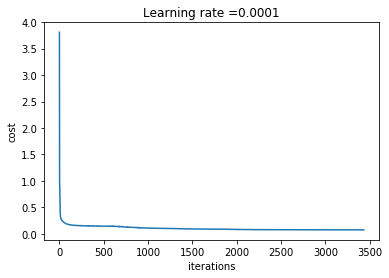

In [42]:
# plot the cost
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

To have a clearer look, we omit first few entries.

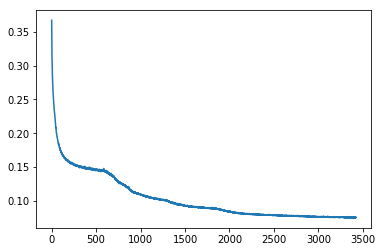

In [48]:
plt.plot(np.squeeze(costs[10:]));

### Model Performance Evaluation 

In [49]:
# Calculate the correct predictions
correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

# Calculate accuracy on the test set
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}, session=sess))
print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}, session=sess))
print ("Dev Accuracy:", accuracy.eval({X: X_dev, Y: Y_dev}, session=sess))

Train Accuracy: 0.960997
Test Accuracy: 0.9588
Dev Accuracy: 0.962186


### Predict Outcome

In [35]:
def predict(IMG, parameters):
    
#     W1 = tf.convert_to_tensor(parameters["W1"])
#     b1 = tf.convert_to_tensor(parameters["b1"])
#     W2 = tf.convert_to_tensor(parameters["W2"])
#     b2 = tf.convert_to_tensor(parameters["b2"])
#     W3 = tf.convert_to_tensor(parameters["W3"])
#     b3 = tf.convert_to_tensor(parameters["b3"])
    
    params = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3}
    
    #z3 = forward_propagation_for_predict(x, params)
    # MODEL
    X = tf.placeholder("float", [n_x, None])
    Z1 = tf.add(tf.matmul(W1, X), b1)                      # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)                     # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)                     # Z3 = np.dot(W3,Z2) + b3
    
    p = tf.argmax(Z3)
    
    print(X)
    #sess = tf.Session()
    prediction = sess.run(p, feed_dict = {X: IMG})
        
    return prediction

In [36]:
def forward_propagation_for_predict(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
#     W1 = parameters['W1']
#     b1 = parameters['b1']
#     W2 = parameters['W2']
#     b2 = parameters['b2']
#     W3 = parameters['W3']
#     b3 = parameters['b3'] 

    return Z3

### Generate Random Mini-batches

In [37]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:,permutation]
    shuffled_Y = Y[:,permutation].reshape((Y.shape[0],m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:,k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:,k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:,num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:,num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [38]:
print(X_train.shape, Y_train.shape)
batches=random_mini_batches(X_train,Y_train,mini_batch_size=minibatch_size,seed=0)
A,B = batches[1]
print(A.shape, B.shape)

(19, 176626) (4, 176626)
(19, 32) (4, 32)
